# Redes Bayesianas y GAM

## 1. Librerias y datos

In [1]:
import pandas as pd
import numpy as np
import io
import warnings
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')
vars_s=['arrival_month','deposit_type_Non Refund','is_repeated_guest','reserverd/assigned','hotel_Resort Hotel']

Y = data.is_canceled
X = data[vars_s]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)
#Vars selected


Train (6700, 5) (6700,)
Test (3300, 5) (3300,)


## GAMS 

Los modelos aditivos generalizados fueron inventados originalmente por Trevor Hastie y Robert Tibshirani en 1986. El marco de los GAM se basa en un modelo mental atractivo y sencillo:

* Las relaciones entre los predictores individuales y la variable dependiente siguen patrones suaves que pueden ser lineales o no lineales.
* Podemos estimar estas relaciones suaves simultáneamente y luego predecir g(E(Y)) simplemente sumándolas.

Desde el punto de vista matemático, la GAM es una técnica de modelización aditiva en la que el impacto de las variables predictivas se capta a través de funciones suaves que, dependiendo de los patrones subyacentes en los datos, pueden ser no lineales

In [4]:
from pygam import LogisticGAM
import pygam

gam = LogisticGAM().fit(X_train,  y_train)
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     15.6522
Link Function:                        LogitLink Log Likelihood:                                 -3354.7508
Number of Samples:                         6700 AIC:                                              6740.806
                                                AICc:                                             6740.894
                                                UBRE:                                                3.008
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2421
Feature Function                  Lam

In [5]:
gam.accuracy(X_train,  y_train)

0.7467164179104477

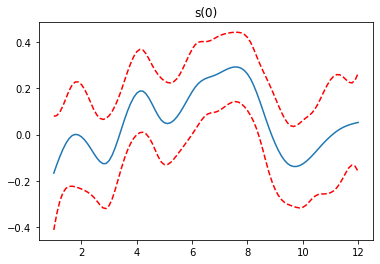

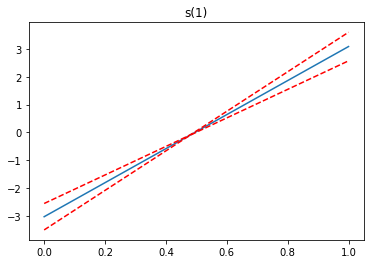

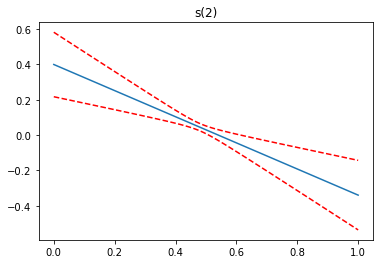

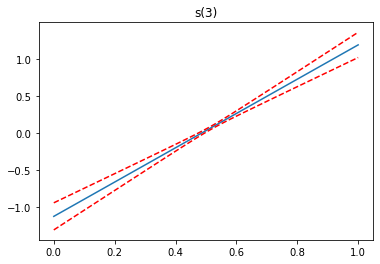

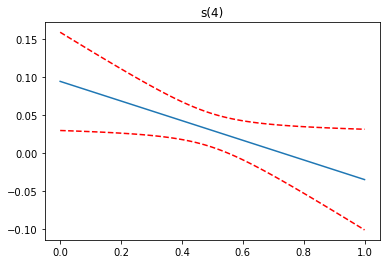

In [6]:
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(term))
    plt.show()

In [7]:
gam.gridsearch(X_train,  y_train)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                       8.104
Link Function:                        LogitLink Log Likelihood:                                 -3359.9649
Number of Samples:                         6700 AIC:                                             6736.1378
                                                AICc:                                            6736.1653
                                                UBRE:                                               3.0064
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.241
Feature Function                  Lam

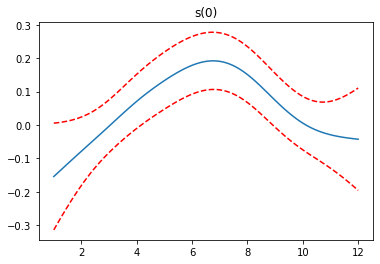

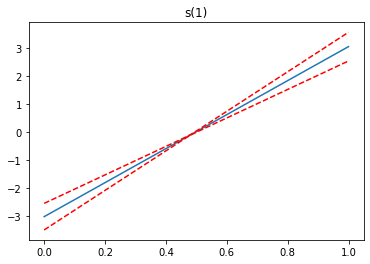

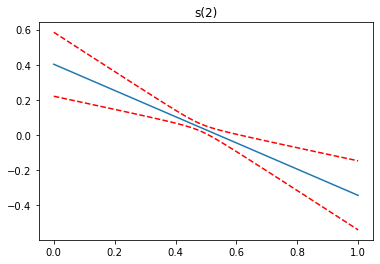

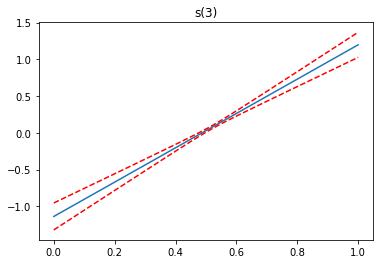

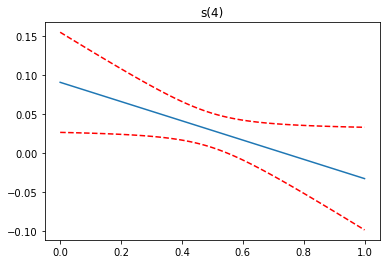

In [8]:
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(term))
    plt.show()

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

predictions = gam.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(y_test, predictions)))
probas = gam.predict_proba(X_test)      
print("Log Loss: {} ".format(log_loss(y_test, probas)))

Accuracy: 0.7372727272727273 
Log Loss: 0.5103032074387708 
